# National Institute of Technology Karnataka Surathkal

## EC704 - VLSI Design Automation

## **Assignment 1**

## **MEMBERS**

- Inbasekaran Perumal : inba.201ec226@nitk.edu.in
- Meghna Uppuluri : meghna.201ec237@nitk.edu.in


## **_Course Instructor_**

- Dr. Ramesh Kini M.

## Git-hub link
https://github.com/the-pinbo/vlsi-cad/blob/main/Assignment-1/first_draft.ipynb


In [1]:
# to plot the rectangles
import matplotlib.pyplot as plt
# to parse the text file
import re
# to store the data as a dataframe
import pandas as pd
#  type hinting for the function
from typing import Optional, List, Tuple, Set
# default dictionary to store rectangles
from collections import defaultdict



In [2]:
def parse_file(filename: str) -> pd.DataFrame:
    """
    Parse the text file and return a dataframe with the rectangle coordinates and ids of the form:
    rectangle_id, x_min, y_min, x_max, y_max

    Uses regular expressions to parse the text file that consists of 5 comma-separated values each of which is a sequence of one or more digits

    NOTE: Change the regular expression pattern to match the text file that you are using refer to the following link for more information: https://regex_min01.com/ 
    ----------
    regular expression pattern:
        regex = r".(\d+),(.\d+),(.\d+),(.\d+),(.\d+)."
        details:
            `.` is used to match any character except a newline
            `\d+` is used to match one or more digits
        the `.` is used to match any character except a newline, which ensures that the pattern matches the entire string even if it contains space characters or other characters other than digits `{` or `}`

    Args:
    ----------
        filename (str): path to the text file

    Returns:
    ----------
        pd.DataFrame: a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner

        the index of the dataframe is the rectangle_id
    """

    # read the file
    with open(filename, 'r') as file:
        data = file.read()
    # regular expression pattern is used to match a string
    # that consists of five comma-separated values

    regex = r".(\d+),(.\d+),(.\d+),(.\d+),(.\d+)."
    matches = re.findall(regex, data)

    df = pd.DataFrame(matches, columns=[
                      'rectangle_id', 'x_min', 'y_min', 'x_max', 'y_max'])
    df[['x_min', 'y_min', 'x_max', 'y_max']] = df[[
        'x_min', 'y_min', 'x_max', 'y_max']].astype(int)

    return df.set_index('rectangle_id',inplace=False)


In [3]:
df = parse_file('test_data.txt')
print(df.describe())
df

           x_min      y_min      x_max      y_max
count  10.000000  10.000000  10.000000  10.000000
mean    8.300000  10.400000  12.400000  14.400000
std     4.423423   3.339993   4.325634   3.717825
min     3.000000   5.000000   7.000000   9.000000
25%     4.500000   8.000000   9.500000  10.500000
50%     8.500000  10.500000  12.000000  16.000000
75%    10.750000  13.000000  14.500000  17.750000
max    16.000000  15.000000  19.000000  18.000000


,x_min,y_min,x_max,y_max
rectangle_id,,,,
1,4,13,7,16
2,10,13,13,16
3,3,11,13,18
4,6,7,11,12
5,7,8,9,10
6,11,8,15,10
7,13,10,19,18
8,16,14,19,17
9,10,15,11,18


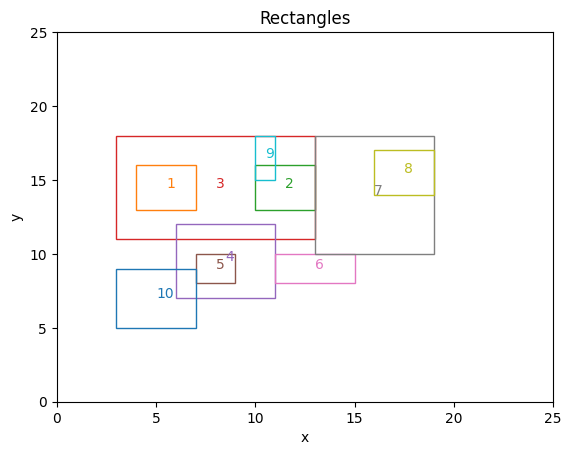

In [4]:
def plotRectangles(rectangles_df: pd.DataFrame, point: Optional[tuple[int,int]] = None)-> None:
    """
    Plot the rectangles and the point if provided

    Args:
    ----------
        rectangles_df (pd.DataFrame): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner

        point (Optional[tuple[int,int]], optional): the x and y coordinates of the point to be plotted. Defaults to None.
    """
    fig, ax = plt.subplots()
    for rectangle_id,rectangle in df.iterrows():
        x_min, y_min, x_max, y_max = rectangle
        # add a rectangle to the plot
        # edgecolor=f'C{rectangle_id}' is used to set the color of the rectangle to the color of the rectangle_id
        ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min,
                     y_max - y_min, fill=None, edgecolor=f'C{rectangle_id}')) 
        # add the id of the rectangle to the plot
        ax.annotate(rectangle_id, (x_min + (x_max - x_min) / 2,
                    y_min + (y_max - y_min) / 2), color=f'C{rectangle_id}')

    # set the limits of the axes
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 25)
    if point != None:
        ax.plot(point[0], point[1], marker="o", markersize=5,
                markeredgecolor="red", markerfacecolor="green")
    ax.set_title('Rectangles')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()


plotRectangles(df)


### Q1) Accept input {x, y} from the keyboard. Print if this point lies within any of the rectangles in the given test data set. If yes then list the rectangles enclosing the given point in the format {rectangle_id, rectangle_id, rectangle_id, ... rectangle_id}.

Eg: {1, 5, 8} implies that given point(x, y) is enclosed in the rectangles 1, 5 and 8.


In [5]:
def inRectangle(x_min: int, y_min: int, x_max: int, y_max: int, x: int, y: int) -> bool:
    """Check if a point is inside a rectangle

    Args:
    ----------
        x_min (int): x coordinate of the bottom left corner
        y_min (int): y coordinate of the bottom left corner
        x_max (int): x coordinate of the top right corner
        y_max (int): y coordinate of the top right corner
        x (int): x coordinate of the point
        y (int): y coordinate of the point

    Returns:
    ----------
        bool: True if the point is inside the rectangle, False otherwise
    """

    return x >= x_min and x <= x_max and y >= y_min and y <= y_max


In [6]:
def pointInRectangles(rectangles: pd.DataFrame, point: tuple[int, int]) -> Optional[pd.DataFrame]:
    """Find the rectangles that contain a point and return a dataframe with the rectangles

    Args:
    ----------
        df (pd.DataFrame): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner

        point (tuple[int, int]): the x and y coordinates of the point


    Returns:
        Optional[pd.DataFrame]: a dataframe of rectangles with that point contained in it with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner

    """
    rect_list = []
    for rectangle_id,rectangle in rectangles.iterrows():
        x_min, y_min, x_max, y_max = rectangle
        # check if the point is inside the rectangle
        if inRectangle(x_min, y_min, x_max, y_max, point[0], point[1]):
            # add the rectangle to the list
            rect_list.append([rectangle_id, x_min, y_min, x_max, y_max])
    # if there are rectangles that contain the point return a dataframe with the rectangles
    
    if rect_list:
        # print(rect_list)
        df = pd.DataFrame(rect_list, columns=['rectangle_id', 'x_min', 'y_min', 'x_max', 'y_max']).set_index('rectangle_id',inplace=False)
        # print(df)
        return df


In [7]:
point = (10, 10)
pointInRectangles(df, point)

,x_min,y_min,x_max,y_max
rectangle_id,,,,
4,6,7,11,12


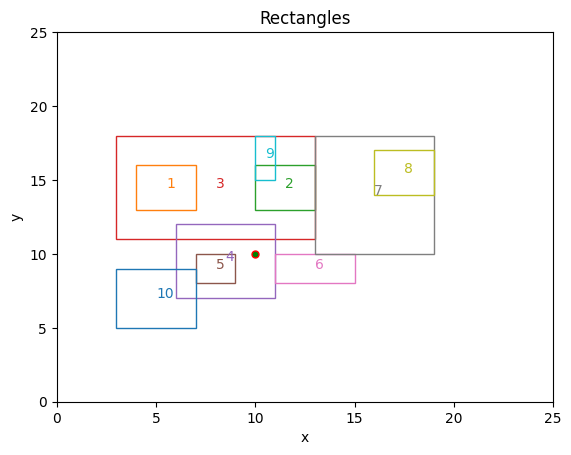

In [8]:
point = (10, 10)
plotRectangles(df, point)


### Q3) List of rectangles that overlap with other rectangles in the format {{rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}, {rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}, ..... {rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}}

Eg: {{5, 7, 9, 12}, {6, 10, 12}} implies that rectangle 5 overlaps with rectangles 7, 9 and 12; rectangle 6 overlaps with rectangles 10 and 12.


In [9]:
def overlap(rect1:pd.Series, rect2:pd.Series)->bool:
    """Check if two rectangles overlap

    Args:
    ----------
        rect1 (pd.Series): rectangle 1
        rect2 (pd.Series): rectangle 2
        rect1 and rect2 have the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner


    Returns:
    ----------
        bool: True if the rectangles overlap, False otherwise
    """
    x_min, y_min, x_max, y_max = rect1
    x_min2, y_min2, x_max2, y_max2 = rect2
    return x_max>x_min2 and x_min<x_max2 and y_max>y_min2 and y_min<y_max2


def overLappingRectangles(rectangles:pd.DataFrame)->defaultdict[List[int]]:
    """Find the overlapping rectangles and return a list of tuples with the pair ids of the overlapping rectangles

    Args:
    ----------
        rectangles (pd.DataFrame): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner

    Returns:
    ----------
        defaultdict[List[int]]: a dictionary with the rectangle ids as keys and a list of overlapping rectangles as values
        similar to an adjacency list in a graph
        if the rectangles 1 and 2 overlap, the dictionary will have the following key-value pairs:
            1: [2]
            2: [1]

    """
    overlap_dict = defaultdict(list[int])
    for i in range(rectangles.shape[0]):
        rect1 = rectangles.iloc[i, :]
        for j in range(i+1, rectangles.shape[0]):
            rect2 = rectangles.iloc[j, :]
            # print(i,j,rect1, rect2)# DEBUG
            if overlap(rect1, rect2):
                overlap_dict[rectangles.index[i]].append(rectangles.index[j])
                overlap_dict[rectangles.index[j]].append(rectangles.index[i])
    return overlap_dict


In [10]:
contained_rect_dict = overLappingRectangles(df)
contained_rect_dict

defaultdict(list[int],
            {'1': ['3'],
             '3': ['1', '2', '4', '9'],
             '2': ['3', '9'],
             '9': ['2', '3'],
             '4': ['3', '5', '10'],
             '5': ['4'],
             '10': ['4'],
             '7': ['8'],
             '8': ['7']})

In [11]:
def plotOverlapRect(rectangles_df: pd.DataFrame, over_lap_rect_dict: defaultdict[List[int]]) -> None:
    """Plot overlapping rectangles

    Args:
    ----------
        rectangles_df (pd.DataFrame): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner


        over_lap_rect_dict (defaultdict[List[int]]): a dictionary with the rectangle ids as keys and a list of overlapping rectangles as values
    """

    def plotRect(ax, x_min: int, y_min: int, x_max: int, y_max: int, rectangle_id: int, color_id: int = None):
        """
        Plot a rectangle
        """
        color = f'C{color_id}' if color_id else 'black'
        ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min,
                                   y_max - y_min, fill=None, edgecolor=color))
        ax.annotate(rectangle_id, (x_min + (x_max - x_min) / 2,
                    y_min + (y_max - y_min) / 2), color=color)
    
    

    for over_lap_rect_id in contained_rect_dict:
        fig, ax = plt.subplots()
        for rectangle_id in contained_rect_dict[over_lap_rect_id]:
            rect = df.loc[rectangle_id]
            plotRect(ax, rect.x_min, rect.y_min, rect.x_max, rect.y_max, rectangle_id, over_lap_rect_id,)
        rect = df.loc[over_lap_rect_id]
        plotRect(ax, rect.x_min, rect.y_min, rect.x_max, rect.y_max, over_lap_rect_id)
        ax.set_xlim(0, 20)
        ax.set_ylim(0, 20)
        ax.set_aspect('equal')
        ax.set_title('Rectangles')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        plt.show()

        plt.show()



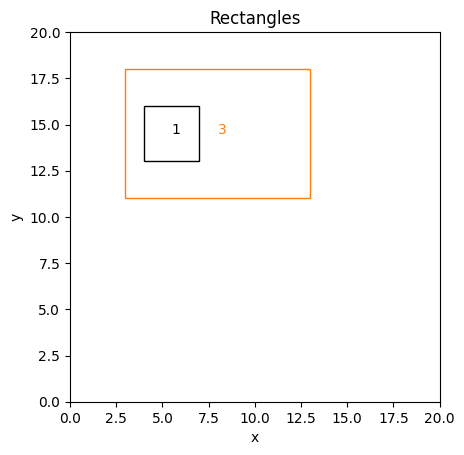

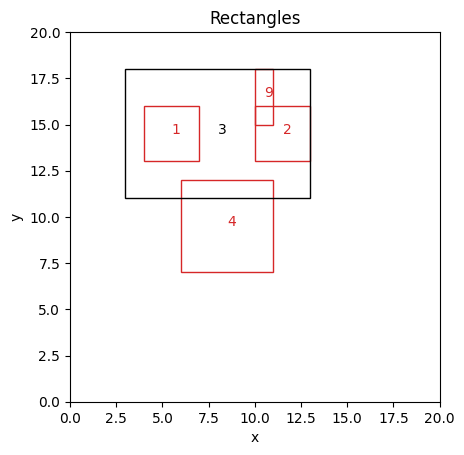

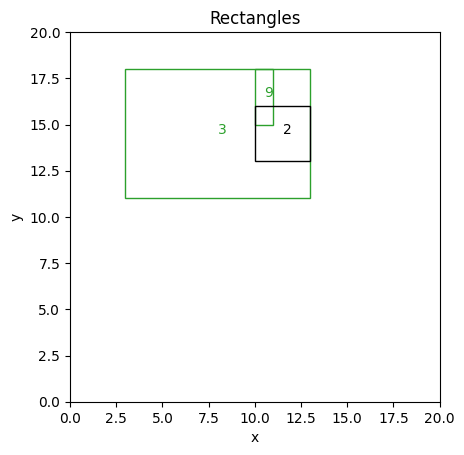

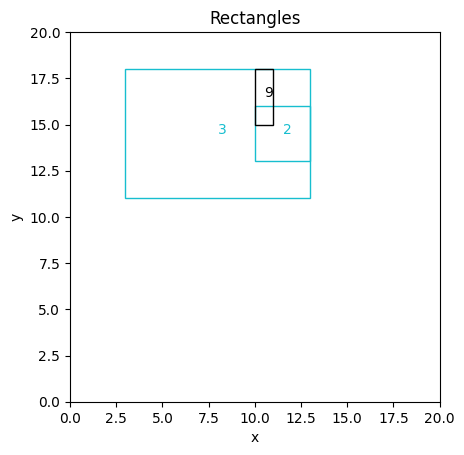

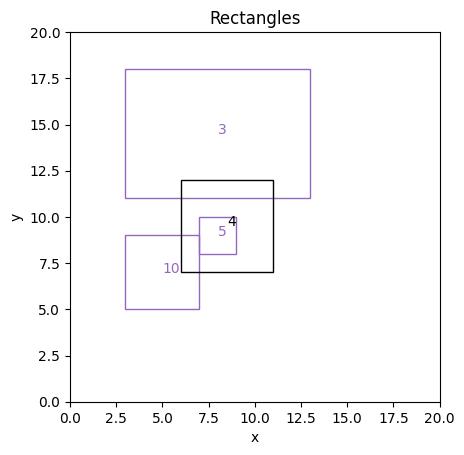

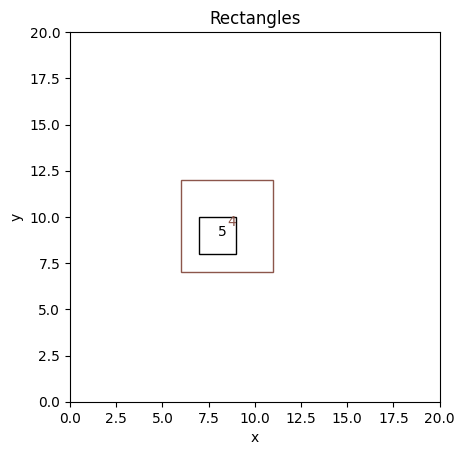

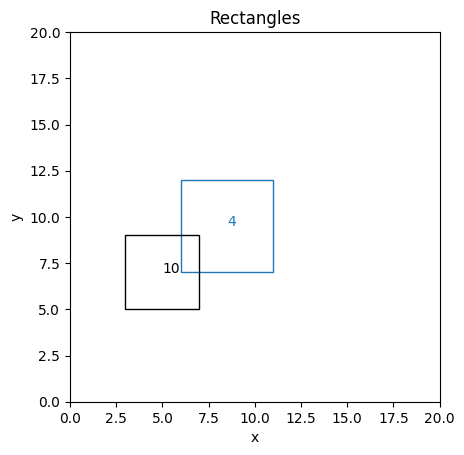

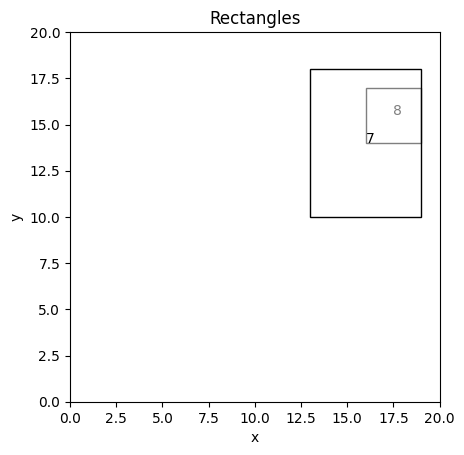

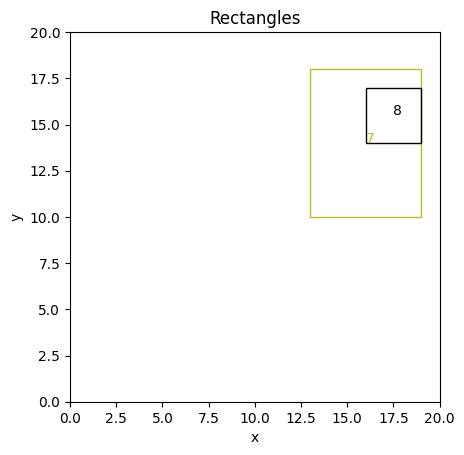

In [12]:
plotOverlapRect(df, contained_rect_dict)

### Q2) List of rectangles that don't overlap any other rectangles. The output should be in the format {rectangle_id, rectangle_id, rectangle_id, ... rectangle_id}


In [13]:
def getUniOverlapRect(over_lap_rect_dict: defaultdict[List[int]])->Set:
    """Get the unique overlapping rectangles

    Args:
    ----------
        over_lap_rect_dict (defaultdict[List[int]]): a dictionary with the rectangle ids as keys and a list of overlapping rectangles as values

    Returns:
    ----------
        set: a set of the unique overlapping rectangles
    """
    unq_over_lap_rect = {over_lap_rect_id for over_lap_rect_id in contained_rect_dict}
    return unq_over_lap_rect
            

In [14]:
getUniOverlapRect(contained_rect_dict)

{'1', '10', '2', '3', '4', '5', '7', '8', '9'}

In [15]:
def getNonOverlapRect(rectangles_df: pd.DataFrame, over_lap_rect_dict: defaultdict[List[int]])->Set:
    """
    Get non overlapping rectangles
    Args:
    ----------
        rectangles_df (pd.DataFrame): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner
        over_lap_rect_dict (defaultdict[List[int]]): a dictionary with the rectangle ids as keys and a list of overlapping rectangles as values

    Returns:
    ----------
        set: a set containing non overlapping rectangles 
    """
    return set(df.index) - getUniOverlapRect(contained_rect_dict)

In [16]:
abut_rect = getNonOverlapRect(df, contained_rect_dict)
abut_rect

{'6'}

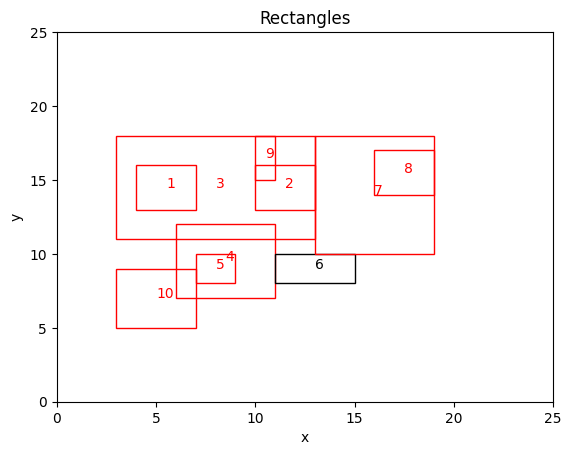

In [17]:
def plotNonOverlapRectangles(rectangles_df: pd.DataFrame, non_over_lapping_rectangles: set)-> None:
    """
    Plot the non overlapping rectangles, overlapping rectangles in red and the non overlapping one in black.

    Args:
    ----------
        rectangles_df (pd.DataFrame): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner
        
        non_over_lapping_rectangles (set): a set of the non overlapping rectangles


    """
    fig, ax = plt.subplots()
    for rectangle_id,rectangle in df.iterrows():
        x_min, y_min, x_max, y_max = rectangle
        # add a rectangle to the plot
        # edgecolor=f'C{rectangle_id}' is used to set the color of the rectangle to the color of the rectangle_id
        color = 'black' if rectangle_id in non_over_lapping_rectangles else 'red'
        ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min,
                     y_max - y_min, fill=None, edgecolor=color)) 
        # add the id of the rectangle to the plot
        ax.annotate(rectangle_id, (x_min + (x_max - x_min) / 2,
                    y_min + (y_max - y_min) / 2), color=color)

    # set the limits of the axes
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 25)
    ax.set_title('Rectangles')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()


plotNonOverlapRectangles(df,abut_rect)

### Q4) List of rectangles that contain other rectangles in the format {rectangle_id, list_of_rectangle_ids_which_are_contained_in}
Eg: {{5, 2, 6}, {4, 3, 9}} implies that rectangle 5 contains rectangles 2 and 6; rectangle 4 contains rectangles 3 and 9.

In [18]:
def contain(rect_out:pd.Series, rect_in:pd.Series)->bool:
    """Check if the inner rectangle is contained in the outer rectangle

    Args:
    ----------
        rect1 (pd.Series): outer rectangle 
        rect2 (pd.Series): inner rectangle

    Returns:
    ----------
        bool: True if the inner rectangle is contained in the outer rectangle, False otherwise
    """
    x_min_out, y_min_out, x_max_out, y_max_out = rect_out
    x_min_in, y_min_in, x_max_in, y_max_in = rect_in
    return x_max_in <= x_max_out and x_min_in >= x_min_out and y_max_in <= y_max_out and y_min_in >= y_min_out

In [19]:
def containedRect(rectangles: pd.DataFrame) -> defaultdict[List[int]]:
    """
    Find the rectangles that are contained in other rectangles and return dictionary with the rectangle ids as keys and a list of rectangles that contain them as values

    Args:
    ----------
        rectangles (pd.DataFrame): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner

    Returns:
    ----------
        defaultdict[List[int]]: a dictionary with the rectangle ids as keys and a list of overlapping rectangles as values
        if the rectangles 1 and 2 overlap, the dictionary will have the following key-value pairs:
            1: [2]

    """
    contained_dict = defaultdict(list[int])
    for i in range(rectangles.shape[0]):
        rect_out = rectangles.iloc[i, :]
        for j in range(rectangles.shape[0]):
            rect_in = rectangles.iloc[j, :]
            if i != j and contain(rect_out, rect_in):
                contained_dict[rectangles.index[i]].append(rectangles.index[j])
    return contained_dict


In [20]:
contained_rect_dict = containedRect(df)
contained_rect_dict

defaultdict(list[int], {'3': ['1', '2', '9'], '4': ['5'], '7': ['8']})

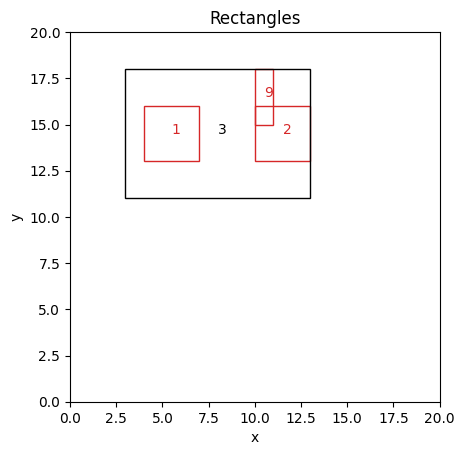

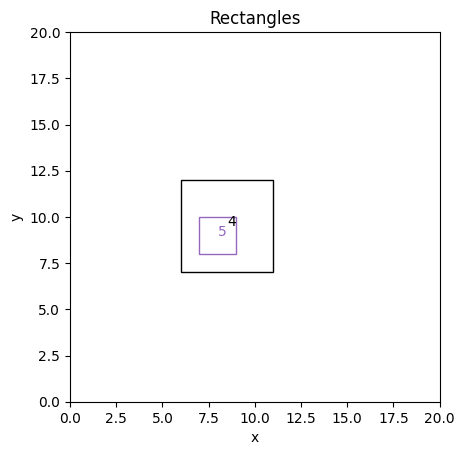

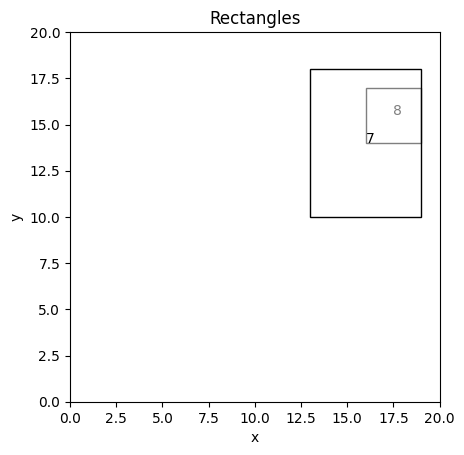

In [21]:
def plotContainedRect(rectangles_df: pd.DataFrame, contained_rect_dict: defaultdict[List[int]]) -> None:
    """Plot contained rectangles. Outer rectangle in black and the inner rectangles in other colors 

    Args:
    ----------
        rectangles_df (pd.DataFrame): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner


        over_lap_rect_dict (defaultdict[List[int]]): a dictionary with the rectangle ids as keys and a list of overlapping rectangles as values
    """

    def plotRect(ax, x_min: int, y_min: int, x_max: int, y_max: int, rectangle_id: int, color_id: int = None):

        color = f'C{color_id}' if color_id else 'black'
        ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min,
                                   y_max - y_min, fill=None, edgecolor=color))
        ax.annotate(rectangle_id, (x_min + (x_max - x_min) / 2,
                    y_min + (y_max - y_min) / 2), color=color)
    
    

    for contained_rect_id in contained_rect_dict:
        fig, ax = plt.subplots()
        for rectangle_id in contained_rect_dict[contained_rect_id]:
            rect = df.loc[rectangle_id]
            plotRect(ax, rect.x_min, rect.y_min, rect.x_max, rect.y_max, rectangle_id, contained_rect_id,)
        rect = df.loc[contained_rect_id]
        plotRect(ax, rect.x_min, rect.y_min, rect.x_max, rect.y_max, contained_rect_id)
        ax.set_xlim(0, 20)
        ax.set_ylim(0, 20)
        ax.set_aspect('equal')
        ax.set_title('Rectangles')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        plt.show()

        plt.show()


plotContainedRect(df, contained_rect_dict)

### Q5) List the rectangles that are abutting each other in the following format {rectangle_id, which side_(e, w, n, s), rectangle_id_of_abutting_rectangle_id}
Eg: {{5, n, 7}, {4, e, 3}} implies that rectangle 5 has rectangle 7 abutting it on the northern side, rectangle 4 has rectangle 3 abutting it on the eastern side.

In [22]:
def get_abut_dir(rect1: pd.Series, rect2:pd.Series) -> Optional[str]:
    """Get the direction of the abutment between two rectangles

    Args:
    ----------
        rect1 (pd.Series): rectangle 1
        rect2 (pd.Series): rectangle 2

    Returns:
    ----------
        Optional[str]: the direction of the abutment between the two rectangles, None if the rectangles do not abut
            W: rect1 is west of rect2
            E: rect1 is east of rect2
            S: rect1 is south of rect2
            N: rect1 is north of rect2
    """
    x_min1, y_min1, x_max1, y_max1 = rect1
    x_min2, y_min2, x_max2, y_max2 = rect2

    if x_min1 == x_max2 and y_min1 < y_max2 and y_max1 > y_min2:
        return "W"
    elif x_min2 == x_max1 and y_min2 < y_max1 and y_max2 > y_min1:
        return "E"
    elif y_min1 == y_max2 and x_min1 < x_max2 and x_max1 > x_min2:
        return "S"
    elif y_min2 == y_max1 and x_min2 < x_max1 and x_max2 > x_min1:
        return "N"
    else:
        return None


In [23]:
def abutRect(rectangles: pd.DataFrame)->Tuple[Tuple[int,str,int]]:
    """
    Find the rectangles that are contained in other rectangles and return dictionary with the rectangle ids as keys and a list of rectangles that contain them as values

    Args:
    ----------
        rectangles (pd.DataFrame): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner

    Returns:
    ----------

    """
    abut_rect = list()
    for i in range(rectangles.shape[0]):
        rect_out = rectangles.iloc[i, :]
        for j in range(rectangles.shape[0]):
            rect_in = rectangles.iloc[j, :]
            if i != j:
                dir = get_abut_dir(rect_out, rect_in)
                if dir:
                    abut_rect.append((rectangles.index[i], dir, rectangles.index[j]))
    return tuple(abut_rect)
                

In [24]:
abut_rect_list = abutRect(df)
abut_rect_list

(('2', 'E', '7'),
 ('3', 'E', '7'),
 ('4', 'E', '6'),
 ('5', 'W', '10'),
 ('6', 'W', '4'),
 ('6', 'N', '7'),
 ('7', 'W', '2'),
 ('7', 'W', '3'),
 ('7', 'S', '6'),
 ('10', 'E', '5'))

In [25]:
def plotAbutRect(rectangles_df: pd.DataFrame, abut_rect: Tuple[int,str,int])-> None:
    """
    Plot the rectangles that abut each other in back and the rest in red

    Args:
    ----------
        rectangles_df (pd.DataFrame): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner
        
        non_over_lapping_rectangles (set): a set of the non overlapping rectangles


    """
    fig, ax = plt.subplots()

    for rectangle_id,rectangle in df.iterrows():
        x_min, y_min, x_max, y_max = rectangle
        # add a rectangle to the plot
        # edgecolor=f'C{rectangle_id}' is used to set the color of the rectangle to the color of the rectangle_id
        color = 'black' if rectangle_id in abut_rect else 'red'
        ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min,
                     y_max - y_min, fill=None, edgecolor=color)) 
        # add the id of the rectangle to the plot
        ax.annotate(rectangle_id, (x_min + (x_max - x_min) / 2,
                    y_min + (y_max - y_min) / 2), color=color)

    # set the limits of the axes
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 25)
    ax.set_title('Rectangles')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()


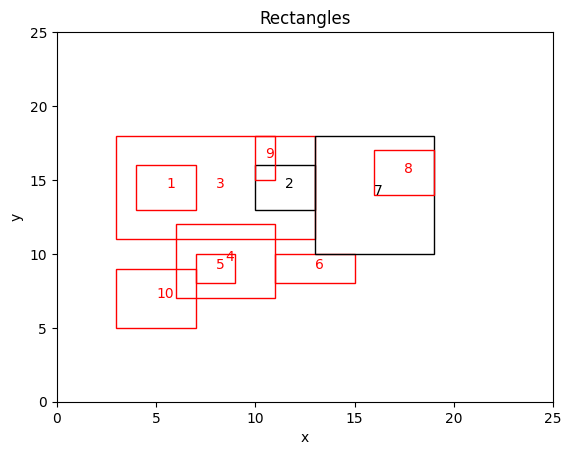

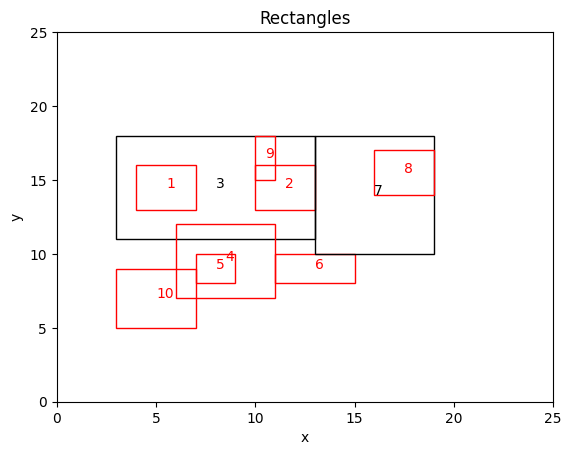

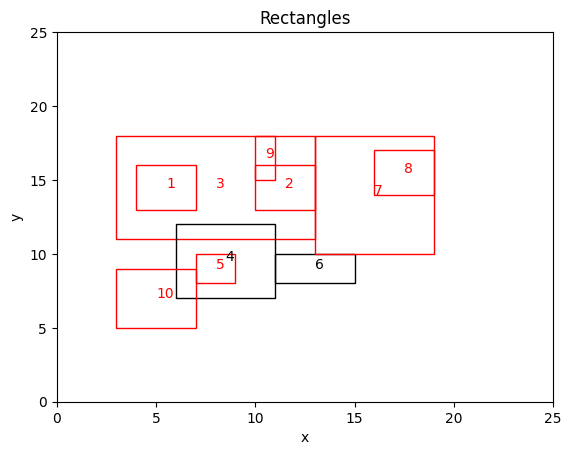

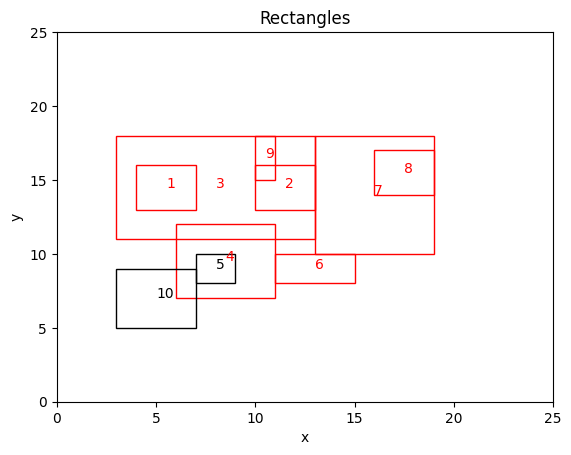

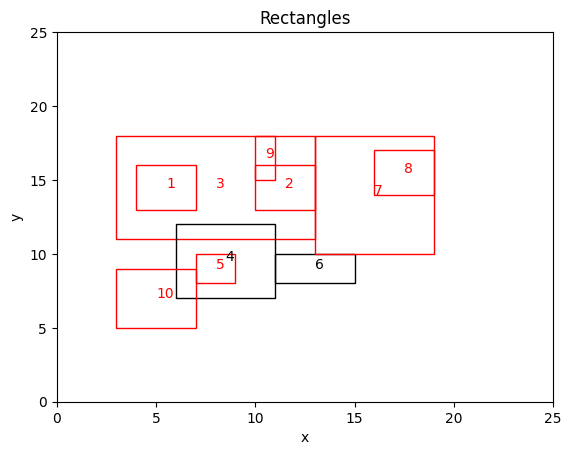

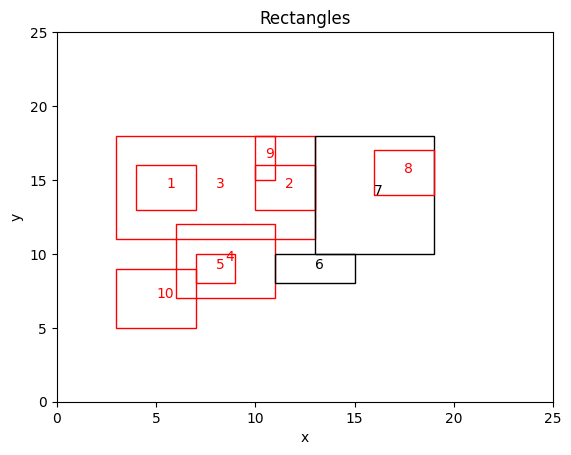

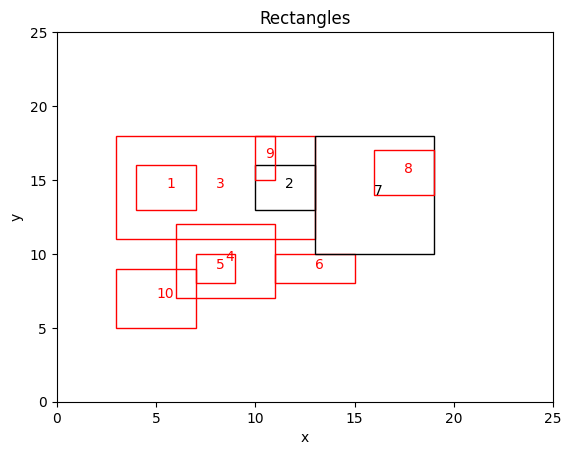

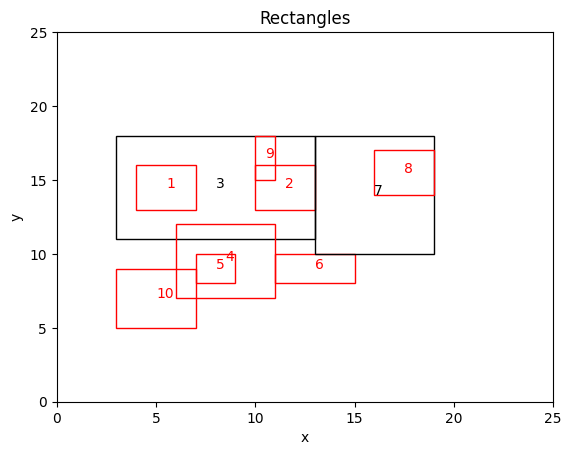

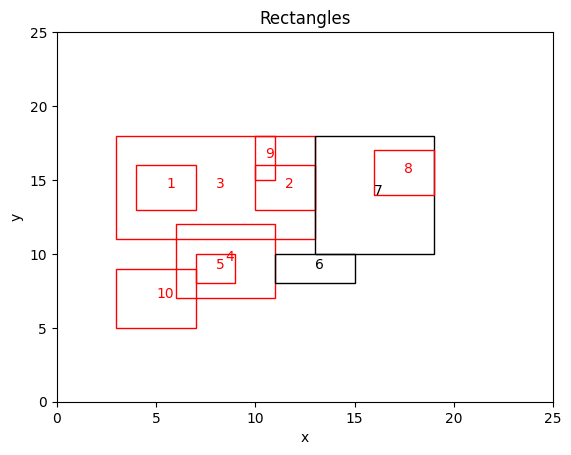

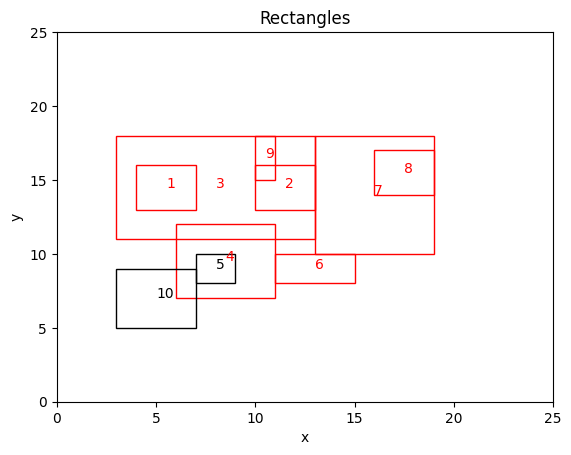

In [26]:
for abut_rect in abut_rect_list:
    plotAbutRect(df, abut_rect)